In [10]:
import pygplates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap

%matplotlib inline

########################################
# Matthews2016 model
# Import the lithologic data of Matthews2016
point_feature_filename = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_CookCut_DeleteDataUsingStartAge.shp'
input_feature_collection = pygplates.FeatureCollection(point_feature_filename)

#Rotation:Global_EB_410-0Ma_GK07_Matthews_etal_PMAG_fixed_crossovers.rot
input_rotation_filename_Matthews2016PMAG_fixed = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Global_EB_410-0Ma_GK07_Matthews_etal_PMAG_fixed_crossovers.rot']
rotation_model = pygplates.RotationModel(input_rotation_filename_Matthews2016PMAG_fixed)

########################################
# Scotess2008 model
#point_feature_filename = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Scotese_410-0Ma/CEG/PresentDay_LithData_Scotese_CEG_410-0Ma_Integrated/PresentDay_CEG_Scotese2008_410-0Ma_AddStartAgeEndAge_CookCut.shp'
#input_feature_collection = pygplates.FeatureCollection(point_feature_filename)

#input_rotation_filename_Scotese2008 = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/PALEOMAP_PlateModel.rot']
#rotation_model = pygplates.RotationModel(input_rotation_filename_Scotese2008)


########################################
# Golonka model
#point_feature_filename = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Golonka_410-0Ma/PresentDay_CEG_Golonka_410-0Ma_CookedCut_InvalidDataDeletedUsingStartAge.shp'
#input_feature_collection = pygplates.FeatureCollection(point_feature_filename)
#continental_polygons = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Golonka_Phanerozoic_Plate_Motions_GPlates/Phanerozoic_EarthByte_ContinentalRegions.gpml'

#input_rotation_filename_Golonka = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Golonka_Phanerozoic_Plate_Motions_GPlates/Phanerozoic_EarthByte.rot']
#rotation_model = pygplates.RotationModel(input_rotation_filename_Golonka)

In [28]:
def get_paleolithology(point_features,rotation_model):
    pX = []
    pY = []
    pAge = []
    for point in point_features:
        lithcode = point.get_shapefile_attribute('LithCode')
        #if lithcode == 'C' and point.get_reconstruction_plate_id()!=0:
        #if lithcode == 'E' and point.get_reconstruction_plate_id()!=0:
        if lithcode== 'T' or lithcode=='D' or lithcode=='G' and point.get_reconstruction_plate_id()!=0:
            BirthTime = np.median(point.get_valid_time())
            if BirthTime<410:
                pAge.append(BirthTime)
                point_rotation = rotation_model.get_rotation(BirthTime, point.get_reconstruction_plate_id(), anchor_plate_id=0) #obtain rotating rules
                reconstructed_point = point_rotation * point.get_geometry() # carry out reconstruction
                pX.append(reconstructed_point.to_lat_lon()[1])
                pY.append(reconstructed_point.to_lat_lon()[0])         
    return pX,pY,pAge

In [29]:
age_range_list = [(419,393),   # Early Devonian
           (393,388),   # Middle Devonian (Eifelian)
           (388,383),   # Middle Devonian (Givetian)
           (383,359),   # Late Devonian
           (359,331),   # Early Carboniferous (Tournaisian-Visean)
           (331,323),   # Early Carboniferous (Serpukhovian)
           (323,307),   # Late Carboniferous (Bashkirian-Moscovian)
           (307,299),   # Late Carboniferous (Kasimovian-Gzhelian)
           (299,290),   # Early Permian (Asselian-Sakmarian)
           (290,252),   # Middle-Late Permian (Artinskian-Lopingian)
           (252,247),   # Early Triassic
           (247,237),   # Middle Triassic
           (237,201),   # Late Triassic
           (201,164),   # Early and Middle Jurassic
           (164,145),   # Late Jurassic
           (145,113),   # Early Cretaceous (Berriasian-Aptian)
           (113,89.8),   # Late Cretaceous (Albian-Turonian)
           (89.8,66.0),   # Late Cretaceous (Coniacian-Maastrichtian)
           (66.0,56.0),   # Paleocene
           (56.0,47.8),  # Early Eocene (Ypresian?)
           (47.8,33.9),  # Middle and Late Eocene
           (33.9,23.0),  # Oligocene
           (23.0,5.3),    # Miocene
           (0.01,-0.01)]
#print age_range_list[5:]

i = 0
for i in np.arange(0,24,1):
    recon_time = np.mean(age_range_list[i])
    print recon_time

406.0
390.5
385.5
371.0
345.0
327.0
315.0
303.0
294.5
271.0
249.5
242.0
219.0
182.5
154.5
129.0
101.4
77.9
61.0
51.9
40.85
28.45
14.15
0.0


In [30]:
# reconstruct all data and get their x, y coordinates and ages
pX,pY,pAge = get_paleolithology(input_feature_collection,rotation_model)
#print len(pX)
#print pAge


for j in np.arange(0,24,1):
    n = 0
    for i in np.arange(0,len(pAge),1):
        if np.array(pAge[i]) == np.mean(age_range_list[j]):
            n = n+1
            #print np.array(pAge[i])
            #print np.mean(age_range_list[j])
    print n

0
0
0
6
5
1
9
5
72
11
0
0
0
5
6
11
0
1
2
1
2
9
17
228


In [31]:
# remove the sampling bias

result_original = []
result_SamplingBiasRemoved = []
result_flipped = []
result_doubled = []

for i in np.arange(0,24,1):
    
    result = []
    result_0 = []
    result_1 = []
    result_2 = []
    result_3 = []
    
    index = np.where(np.array(pAge) == np.mean(age_range_list[i]))
    #print np.mean(age_range_list[i]),np.array(pAge)[index]
    
    xedges = np.arange(-180, 181, 5) #180, longtitude
    yedges = np.arange(-90, 91, 5) #90, latitude, specify the bin size
    data_hist = np.histogram2d(np.array(pX)[index],np.array(pY)[index], bins=(xedges, yedges))
    result_0 = np.nansum(data_hist[0], axis=0)
    result_original.append(result_0)
    #print type(result_original)
    
    # save the original data
    #df = pd.DataFrame(data_hist[0].T)
    #writer = pd.ExcelWriter('OriginalData_Glacial_%sMa.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter') # Evaporite
    #df.to_excel(writer, sheet_name='Sheet1')
    #writer.save()
    
    # remove the sampling bias
    result_1 = np.nansum(data_hist[0]/data_hist[0], axis=0)
    result_SamplingBiasRemoved.append(result_1)
    
    #plt.pcolor(xedges,yedges,data_hist[0].T) #T means reverse the x, y axis
    
    # flip the data
    result_2 = np.flipud(result_1[:18])+result_1[18:]
    result_flipped.append(result_2) # add data on south hemisphere to north hemishpere
    #print result_flipped
    
    # double the data
    result_3 = list(np.flipud(result_2)) + list(result_2) 
    result_doubled.append(np.array(result_3)) # add data on south hemisphere to north hemishpere
    #print result_doubled

/Users/wenchaocao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


In [32]:
'''
# save data for all time steps into a table
df = pd.DataFrame(result_original)
writer = pd.ExcelWriter('Goals_Golonka_Origianl_BinningSize5.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

# save sampling bias-corrected data for all time steps into a table
df = pd.DataFrame(result_SamplingBiasRemoved)
writer = pd.ExcelWriter('Goals_Golonka_SamplingBiasCorrected_BinningSize5.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()


# save flipped data for all time steps into a table
df = pd.DataFrame(result_flipped)
writer = pd.ExcelWriter('Glacial_Scotese2008_Flipped_410-0Ma.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

# save flipped data for all time steps into a table
df = pd.DataFrame(result_doubled)
writer = pd.ExcelWriter('Glacial_Scotese2008_Doubled_410-0Ma.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

#result_1 = []
#result_1 = np.sum(result,axis=0) # sum up data in Y-axis

'''

"\n# save data for all time steps into a table\ndf = pd.DataFrame(result_original)\nwriter = pd.ExcelWriter('Goals_Golonka_Origianl_BinningSize5.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')\ndf.to_excel(writer, sheet_name='Sheet1')\nwriter.save()\n\n# save sampling bias-corrected data for all time steps into a table\ndf = pd.DataFrame(result_SamplingBiasRemoved)\nwriter = pd.ExcelWriter('Goals_Golonka_SamplingBiasCorrected_BinningSize5.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')\ndf.to_excel(writer, sheet_name='Sheet1')\nwriter.save()\n\n\n# save flipped data for all time steps into a table\ndf = pd.DataFrame(result_flipped)\nwriter = pd.ExcelWriter('Glacial_Scotese2008_Flipped_410-0Ma.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter')\ndf.to_excel(writer, sheet_name='Sheet1')\nwriter.save()\n\n# save flipped data for all time steps into a table\ndf = pd.DataFrame(result_doubled)\nwriter = pd.ExcelWriter('Glacial_Scotese2008_Doubled_410-0Ma.xlsx' % np.mea

### Plot original data and sampling bias removed 

/Users/wenchaocao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


<function matplotlib.pyplot.show>

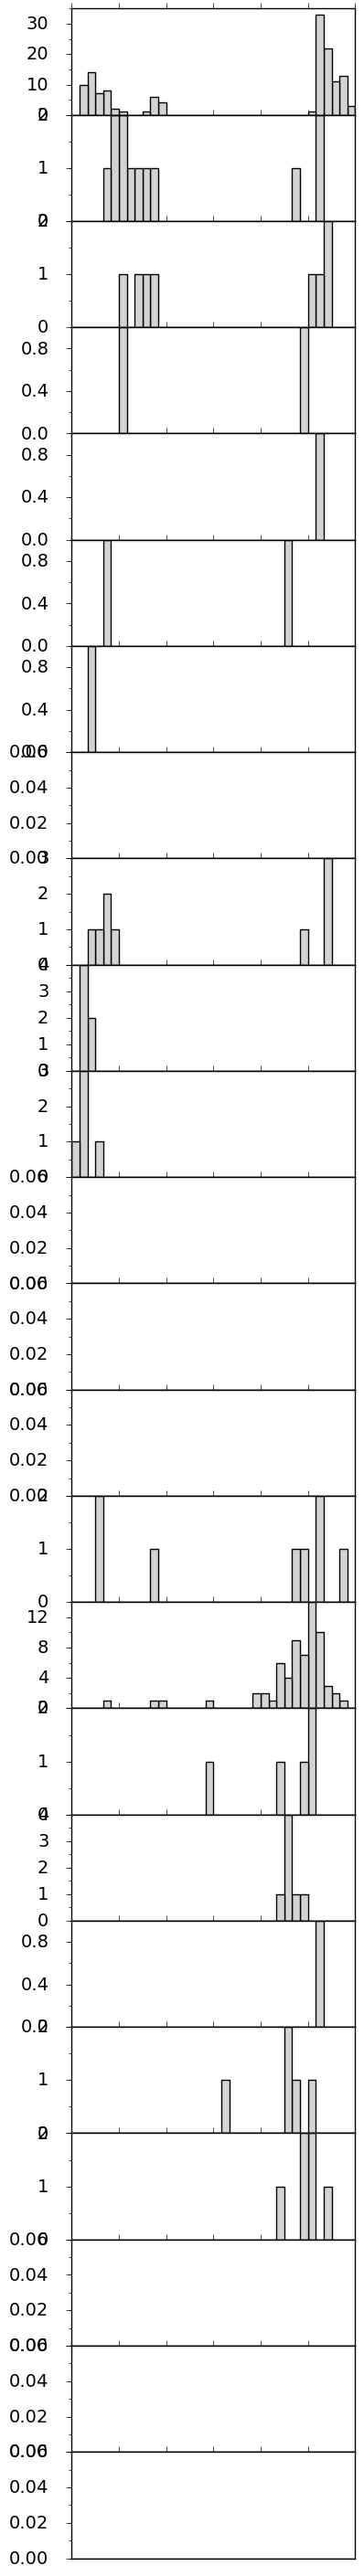

In [34]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, axes = plt.subplots(nrows=24, ncols=1,figsize=(4, 36))  #figsize=(4, 36) #figsize=(0.74, 6.65)
#fig, axes = plt.subplots(figsize=(8, 6)) 

for i in np.arange(0,24,1):
    
    result = []
    
    index = np.where(np.array(pAge) == np.mean(age_range_list[i]))
    #print np.mean(age_range_list[i]),np.array(pAge)[index]
    
    xedges = np.arange(-180, 181, 5) #longtitude
    yedges = np.arange(-90, 91, 5) #latitude, specify the bin size
    data_hist = np.histogram2d(np.array(pX)[index],np.array(pY)[index], bins=(xedges, yedges))
    
    # plot original data
    result_0 = np.nansum(data_hist[0], axis=0)
    #axes[23-i].bar(np.array(yedges[:-1]), result_0, width=5, color='lightgrey') #,alpha=0.4
    
    # plot data sampling bias corrected
    result_1 = np.nansum(data_hist[0]/data_hist[0], axis=0)
    axes[23-i].bar(np.array(yedges[:-1]), result_1, width=5, color='lightgrey') #,alpha=0.4
    
    '''
    # flipped data
    result_2 = np.flipud(result_1[:18])+result_1[18:]
    
    # double the data
    result_3 = list(np.flipud(result_2)) + list(result_2)
    #axes[23-i].bar(np.array(yedges[:-1]), result_3, width=2, color='blue',alpha=0.4)
    '''
    
    axes[23-i].set_xticks(np.arange(-90, 91, 30))
    axes[23-i].set_xticklabels([])
    axes[23-i].set_xlim((90,-90))
    axes[23-i].set_ylim(ymin=0)
    #axes[23-i].set_ylim((0,0.01))
    axes[23-i].xaxis.set_tick_params(direction='out') #labelsize=12,
    #plt.setp(axes[i].get_xticklabels(), fontsize=12.) #,rotation=50
    axes[23-i].yaxis.set_tick_params(labelsize=14,direction='out') #
    axes[23-i].xaxis.set_ticks_position('top') # bottom
    axes[23-i].set_yticks(axes[23-i].get_yticks()[::2]) # set the major ticks
    interval = np.diff(axes[23-i].get_yticks())[0]
    axes[23-i].yaxis.set_minor_locator(MultipleLocator(interval/2))
    axes[23-i].tick_params(which = 'both', direction = 'out') # if only want to set y-axis: axes[1,2].yaxis.set_tick_params(labelsize=12,direction='out')
    axes[23-i].yaxis.set_ticks_position('left')
    

fig.subplots_adjust(hspace=0.00)
plt.savefig('Glacial_Matthews2016_SamplingBiasRemoved_BinningSize5.pdf',dpi=600) #SamplingBiasRemoved
#plt.savefig('Coals_Matthews2016_Original_BinningSize5.pdf')
plt.show

